In [104]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as anim
from IPython.display import HTML
import math

# Tir de fléchette sur une cible

Il s'agit de lancer aléatoirement des fléchettes dans un carré muni d'une cible. La cible sera le cercle de rayon 1 et de centre $(0;0)$ et les fléchette seront lancée dans le carré circonscrit.

![Cible](flechette.png)

La probabilité de lancer la fléchette dans la cible est donc le rapport entre les deux surface, soit 
\begin{equation*}
	p = \frac{\mathcal{A}_\text{cercle}}{\mathcal{A}_\text{carre}} = \frac{\pi}{2*2} = \frac{\pi}{4}
\end{equation*}
	Lorsque l'on tire un grand nombre de fléchette, la loi de grand nombres indique que la proportion des fléchette dans la cible converge vers cette quantité.


### Question 1
Implémenter une fonction `lance_flechette` qui lance aléatoirement une fléchette dans le carré et renvoie vrai si la fléchette est dans la cible et faux sinon.

In [7]:
np.random.uniform(-1,1,size=(2,2))

array([[1.06292838, 0.17744399],
       [1.41256505, 0.05304232]])

In [11]:
def lance_flechette():
    f =  np.random.rand(1,2)
    for i in f:
        d = i[0]**2+i[1]**2
        if(d > 1): return False
    return True
    

0.7853981633974483
0.789


### Question 2
Ecrire une fonction `pi_flechette` qui prend en argument un entier $N$, réalise $N$ lancés de fléchette, trace l'estimation de $\pi$ obtenue au fur et à mesure et renvoie l'estimation obtenue après $N$ lancés.

In [79]:
def pi_flechette(n=1000):
    x = np.linspace(0,n,n)
    y = []
    k = 0
    for i in range(n):
        if(lance_flechette()): k+=1
        y.append(4*k/(i+1))
    fig,ax = plt.subplots()
    print(x)
    ax.plot(x,y)
    print(y[-1])
    

[0.00000000e+00 1.00010001e+00 2.00020002e+00 ... 9.99799980e+03
 9.99899990e+03 1.00000000e+04]
3.1408


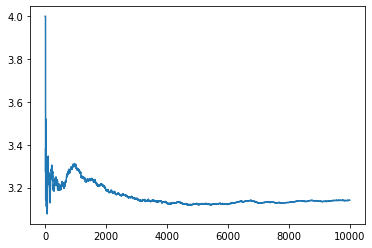

In [80]:
pi_flechette(10000)

# Aiguille de Buffon 

Cette méthode est, elle aussi, basée sur un lancer aléatoire. On considère un parquet dont les lames font une largeur $l$ et sont posées en lignes (parquet à coupe). On laisse tomber, de façon aléatoire, des aiguilles de longueur $a$ sur le plancher et on compte la proportion de ces aiguilles qui sont à chevales sur deux lignes de parquet (on dira qu'elles coupent les lignes formées par le parquet).

![Aiguille de Buffon](buffon.png)

A nouveau, ce ratio converge vers la probabilité qu'une aiguille coupe une ligne de parquet. On admettra que cette probabilité est proportionnelle à $1/l$ (plus les lignes sont espacées moins il y a de chance de les croiser) et à $a$ et vaut $\frac{2a}{l \pi}$. Le nombre $\pi/2$ apparaît en effet car l'angle formé entre l'aiguille et les lignes et compris entre $0$ et $\pi/2$ et joue un rôle déterminant pour savoir si une aiguille coupe une ligne ou non.
    
Pour aller plus loin : https://fr.wikipedia.org/wiki/Aiguille_de_Buffon

**Attention : à la fin de cet exercice, une animation des aiguilles sur le parquet sera faite par le script `calcule_et_dessine.py` disponible sur Dokéos. Pour que cette animation marche correctement, il faut respecter strictement les consignes des questions sur les noms du module et des fonctions, ainsi que les paramètres des fonctions et leurs valeurs de retour.**

### Question 1
Créer une fonction `dessin_parquet` qui dessine les lattes du parquet. Cette fonction doit prendre en argument un objet d'axes pour y faire le dessin. Afin de simplifier les choses, et comme cela ne change en rien la qualité de l'approximation trouvée, nous prendrons des lattes horizontales, de largeur unitaire et de longueur infinie. Il s'agit donc, pour tout entier $n$ compris entre 0 et 10, de dessiner la droite $y=n$. On la représentera uniquement sur le domaine $[0, 10]$. L'appel de `plt.show()` devra être fait en dehors de cette fonction (pour pouvoir afficher les aiguilles et le parquet sur une même figure).


In [31]:
x = lambda : np.random.uniform(0,10,size = (1,2))
print(x())
print(x())

[[4.89414707 5.18481728]]
[[7.03185504 2.10156594]]


No handles with labels found to put in legend.


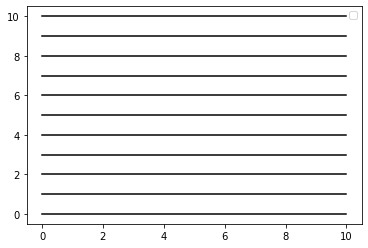

In [110]:
def dessin_parquet(ax):
    n = np.arange(0,11)
    for i in n:
        ax.plot(n,np.ones(11)*i,color = "black")
        
fig, ax = plt.subplots()
dessin_parquet(ax)
ax.legend()

### Question 2 - Jet d'une aiguille
Pour jeter une aiguille, il faut déterminer aléatoirement la position d'une de ses extrémités puis un angle.

![Jet_aiguille](jet_aig.png)
	
1. Ecrire une fonction `jette_aiguille()` qui détermine aléatoirement les coordonnées $(a_x,a_y)$ de l'extrémité $A$ dans le carré $[0, 10] \times [0, 10]$ et l'angle $\theta$. Cette fonction devra renvoyer sous forme d'un tableau $2\times2$ les coordonnées de $A$ dans la première ligne et celles de $B$ dans la seconde.
2. Ecrire une fonction `dessine_aiguille()` qui dessine l'aiguille. Il s'agit donc de dessiner le segment  $[A;B]$. Cette fonction prendra en argument le tableau renvoyé par `jette_aiguille()`.
3. Ecrire une fonction `calcule_intersection()` qui prend en argument le tableau renvoyé par `jette_aiguille()` et renvoie vrai si l'aiguille est à cheval sur 2 lattes, faux sinon. On pourra remarquer que le numéro de la latte sur laquelle se trouve une position est donné par la partie entière de l'ordonnée de la position ($n = \lfloor y \rfloor$)


In [122]:
def jette_aiguille():
    t = 1
    res = np.zeros((2,2))
    the = lambda:np.random.uniform(0,np.pi/2)
    x = lambda : np.random.uniform(0,10,size = (2))
    a = x()
    res[0][0] = a[0]
    res[0][1] = a[1]
    res[1][0] = a[0]+t*np.cos(the())
    res[1][1] = a[1]+t*np.sin(the())
    return res

In [124]:
def dessine_aiguille(ax, seg):
    ax.plot(seg[:,0], seg[:,0],color='red')

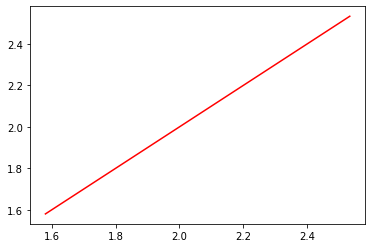

In [129]:
aig = jette_aiguille()
fig, ax = plt.subplots()
dessine_aiguille(ax,aig)

In [132]:
def calcule_intersection(aig):
    if(math.floor(aig[0][1]) != math.floor(aig[1][1])):
        return True
    return False

### Question 3 - Approximation de $\pi$

1. Définir une variable `nb_ite` dans votre script python (prendre par exemple 512) ; elle correspondra au nombre d'aiguille à jeter. Définir une autre variable `+ralenti = 1` qui vous servira à ralentir (en augmentant sa valeur) ou à accélérer l'animation.

2. Exécuter la cellule suivante (commencait par le commentaire `calcule_et_dessine`) : il réalise `nb_ite` jets d'aiguille à l'aide de votre fonction `jette_aiguille`, les dessine et affiche dans le même temps l'approximation de $\pi$ obtenue en fonction du nombre de tirages, calculée à l'aide de votre fonction \verb@calcule_intersection@. 

Remarque : Au besoin, la taille de la figure peut-être modifiée en modifiant la valeur de `figsize` à la ligne 14 du script `calcule_intersection`.

In [133]:
nb_ite = 200

/home/phinease/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in double_scalars


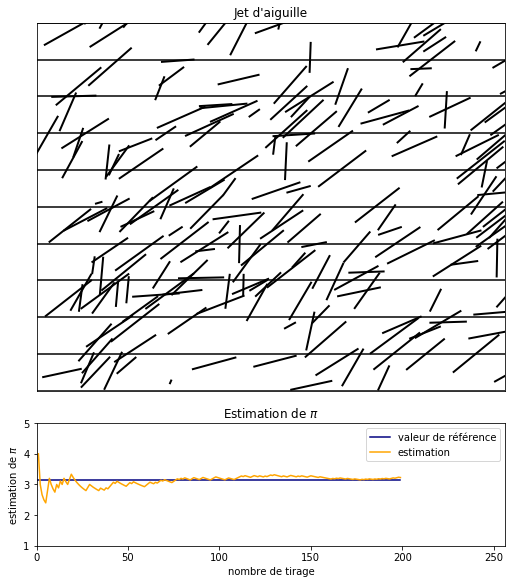

In [134]:
# Création des 2 figures
fig = plt.figure(figsize=(7, 8), constrained_layout=True)
heights = [3, 1]
spec = fig.add_gridspec(ncols=1, nrows=2, height_ratios=heights)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[1, 0])
# Réglage pour l'affichage du parquet et des aiguilles
ax1.set_title("Jet d'aiguille")
ax1.set_xlim([0,10])
ax1.set_ylim([0,10])
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
dessin_parquet(ax1)
# Réglage pour l'affichage de l'estimation de pi
ax2.set_title('Estimation de $\pi$')
ax2.set_xlabel('nombre de tirage')
ax2.set_ylabel('estimation de $\pi$')
ax2.set_ylim(1, 5)
ax2.plot([0, nb_ite-1],[np.pi, np.pi], color='navy', label="valeur de référence")

# Sous-graphique du haut : intialisation d'une ligne par aiguille.
lines = [ax1.plot([], [], color='black', lw=2)[0] for _ in range(nb_ite)]
# Sous-graphique du bas : initialisation d'une ligne pour mettre à jour la valeur de pi.
line2, = ax2.plot([], [], color='orange', label="estimation")
ax2.legend()
lines.append(line2)

# Initialisation des tableaux de données.
xdata, y2data = [0], [1]
ite =0
def run(data):
    # Mise à jour du nombre de lancé
    t = data
    xdata.append(t)
    
    ## Ajout d'une nouvelle aiguille.
    aig0 = jette_aiguille()
    xa = [aig0[0, 0], aig0[1, 0]]
    ya = [aig0[0, 1], aig0[1, 1]]
    lines[t].set_data(xa, ya)
    
    ## Mise à jour de l'estimation de pi   
    # Mise à jour des axes pour suivre le nombre de lancé.
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(0, 1.5*xmax)
    # Ajout de la nouvelle estimation de pi
    prev = 2./y2data[-1]
    y2= (t*prev + calcule_intersection(aig0))/(t+1)
    y2 = 2./y2
    y2data.append(y2)
    lines[-1].set_data(xdata, y2data)
    return lines

x = np.arange(0,nb_ite)#np.linspace(0, 2*np.pi, 128)
ax2.set_xlim(0,10)

ani = anim.FuncAnimation(fig, run, frames=x, repeat=False)
HTML(ani.to_html5_video())

In [137]:
print("Estimation pour n={} : ".format(nb_ite),y2data[-1])

Estimation pour n=200 :  inf


# Calcul d'une intégrale

La dérivée de la fonction $\arctan$ est une fraction rationnelle que l'on peut évaluer sans connaître $\pi$. Elle peut elle même permettre d'estimer $\pi$ à partir de l'égalité suivante :

\begin{equation}
\label{eq:pi_integrale}
\int_0^1 \frac{\mathrm{d}x}{1+x^2} = \Big[ \arctan x \Big]_0^1 = \frac{\pi}{4}
\end{equation}

## Méthode déterministe pour le calcul d'intégrale

### Principe général
Les intégrales les plus simpes à calculer sont les polynômes de petit degrès. Le cas extrème consiste à prendre $f$ constante égale à $K$, son intégrale sur le segment $[a;b]$ est alors égale à $K(b-a)$.

Ici la fonction n'est pas constante mais elle est trés régulière (elle est de classe $\mathcal{C}^{\infty}$). Sur un petit segment $[a,b]$, l'inégalité des accroissements finis fournit :

\begin{equation*}
\forall x \in [a,b], \big\vert f(x) - f(a) \big\vert \leqslant \max_{y\in [a,b]}\big\vert f'(y)\big\vert \vert x -a\vert = \max_{y\in [a,b]}\big\vert f'(y)\big\vert (x -a)
\end{equation*}

### Question 1

Majorer l'éccart entre I, l'intégrale de $f$ sur $[a;b]$ et $I_a$ l'intégrale de $x\mapsto f(a)$ sur le même intervalle.



En intégrant, on trouve donc :

\begin{align}
\Bigg\vert \int_a^b f(x)\mathrm{d}x - \underbrace{f(a)(b-a)}_{\text{intégrale de $x\mapsto f(a)$}} \Bigg\vert 
& \leqslant \int_a^b \big\vert f(x) - f(a) \big\vert \mathrm{d}x \nonumber
\\ & \leqslant \max_{y\in [a,b]}\big\vert f'(y)\big\vert \int_a^b (x-a) \mathrm{d}x
\\ \Bigg\vert \int_a^b f(x)\mathrm{d}x - f(a)(b-a) \Bigg\vert 
& \leqslant \max_{y\in [a,b]}\big\vert f'(y)\big\vert \frac{(b-a)^2}{2}
\end{align}
$f(a)(b-a)$ est donc une bonne approximation de l'intégrale dès que $f'$ est petite ou $(b-a)$ petit.

### Retour au problème de départ
Ici $f': x \mapsto -2x/(1+x^2)^2$ est majorée par $1$:
\begin{align}
    0 \leqslant 1 - 2\vert x \vert + x^2 &\Leftrightarrow 2 \vert x \vert \leqslant 1 + x^2
    \\ &\Rightarrow 2 \vert x \vert \leqslant 1 + x^2 \quad \text{car $1+x^2 \leqslant 1$}
    \\ &\Rightarrow \big\vert f'(x) \big\vert \leqslant 1
\end{align}
Par ailleurs $b-a$ est égal à 1 si on utilise cette approximation directement sur $[a;b]=[0;1]$. L'idée précédente fournirait donc une erreur de l'ordre majorée par $1$ ce qui n'est pas satisfaisant.

Essayons autrement, appliquons cette méthode sur un petit segment $[a;b]=[x_i;x_{i+1}]$ avec $x_i = i \Delta x$ pour $i$ compris entre 0 et $N$ et $\Delta x = 1/N$ : cette fois-ci, l'erreur, sur un petit segment est de $\frac{\Delta x^2}{2} = \frac{1}{2 N^2}$ ce qui est petit pour $N$ grand (par exemple 100, 1000 ou 10 000).
L'idée est alors de mettre bout à bout ces petits segments en remarquant que $x_0 =0$ et $x_N = 1$ :

\begin{equation*}
I = \int_0^1 \frac{\mathrm{d}x}{1+x^2} = \sum_{i=0}^{N-1} \int_{x_i}^{x_{i+1}} \frac{\mathrm{d}x}{1+x^2}
\end{equation*}

### Question 2
A l'aide de la question précédente, calculer la différence entre I et la somme des $\int_{x_i}^{x_{i+1}} \frac{\mathrm{d}x}{1+x_i^2}$

*Réponse*

A l'aide des inégalités précédentes :
\begin{align}
\Bigg\vert \int_{x_i}^{x_{i+1}} \frac{\mathrm{d}x}{1+x^2} - \Delta f(x_i) \Bigg\vert & \leqslant \frac{\Delta x^2}{2}
\\ \Bigg\vert \sum_{i=0}^{10^k -1} \bigg[ \int_{x_i}^{x_{i+1}} \frac{\mathrm{d}x}{1+x^2} - \frac{\Delta x}{1+x_i^2} \bigg] \Bigg\vert 
\leqslant \sum_{i=0}^{N-1} \Bigg\vert \int_{x_i}^{x_{i+1}} \frac{\mathrm{d}x}{1+x^2} - \frac{\Delta x}{1+x_i^2}  \Bigg\vert
& \leqslant \sum_{i=0}^{10^k -1} \frac{\Delta x^2}{2}
\\ \Bigg\vert \int_{x_0}^{x_{N}} \frac{\mathrm{d}x}{1+x^2} - \sum_{i=0}^{N -1}\frac{\Delta x}{1+x_i^2} \bigg] \Bigg\vert 
& \leqslant \frac{\Delta x^2}{2}
\\ \Bigg\vert \int_{0}^{1} \frac{\mathrm{d}x}{1+x^2} - \sum_{i=0}^{N -1}\frac{\Delta x}{1+x_i^2} \bigg] \Bigg\vert 
& \leqslant \frac{\Delta x}{2}
\end{align}

Cela montre, pour $N = 10^k$, que $\sum_{i=0}^{10^k -1}\frac{10^{-k}}{1+x_i^2}$ donne les $k$ premières décimales de $\pi/4$.

![Méthode des rectangles à gauches](approx_int.png)

Pour estimer l'intégrale de $f$, nous allons donc calculer, numériquement :
\begin{equation*}
	I_{\Delta x} = \sum_{i=0}^{n -1} f(i \Delta x) \Delta x,
\end{equation*}
avec $\Delta x = (b-a)/n$ . Pour tester vos codes, vous pourrez prendre $\Delta x = 10^{-k}$ avec $k=1, 2$ ou 3.

### Question 3
1. Ecrire une fonction `pi_int_rect(n)` qui calcule l'approximation de l'intégrale sur $[0;1]$ de $f : x \mapsto \frac{1}{1+x^2}$ puis s'en sert pour renvoyer une approximation de $\pi$.
2. Ecrire une fonction `dessine_pi_rect(N)` qui dessine l'approximation de $\pi$ obtenue pour différente valeurs de $n$ réparties intelligemment entre 0 et $N$.
Par exemple, on pourra tracer l'approximation pour $n=1, 2, 4, 8, 16, 32, \dotsc $ jusqu'à dépasser $N$ (il s'agit donc de prendre 2 fois plus de points à chaque étape).


In [138]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from IPython.display import HTML

In [141]:
def f(x):
    """
    Dérivée de la fonction arctan
    """
    return 1./(1.+x**2)

def pi_int_rect(n):
    """
    Evaluation de pi par la méthode des rectangles
    """
    d = 0.001
    x = np.arange(0,1,d)
    res = 0
    for i in x:
        res += d*f(i)
    return res

In [142]:
print("Estimation pour n=500 : ",pi_int_rect(500))

Estimation pour n=500 :  0.7856481217307805


In [143]:
def dessine_pi_int_rect(n=512):
    """
    Estime Pi à partir du calcul de l'intégrale par la méthode
    des rectangles à gauche et affiche le résultat obtenue en fonction de n.
    """
    return pi_int_rect(n)*4

In [144]:
dessine_pi_int_rect(n=1000)

3.142592486923122

### Méthode de Monte-Carlo

Comme nous l'avons dit précédemment, l'intégrale est aussi égale à l'aire sous la courbe (d'autant plus qu'ici la fonction à intégrer est positive). Rappelons que la fonction est à intégrer entre 0 et 1 et qu'elle même prend des valeurs comprises entre 0 et 1.

Comme pour le tir de fléchette, cette aire peut être approchée en choisissant aléatoirement des points dans $[0;1]\times[0;1]$ et en comptant la proportion des points qui sont sur la courbe.

Cette proportion converge alors vers l'aire sous la courbe divisée par l'aire de $[0;1]\times[0;1]$ qui vaut $1$. Cette méthode de calcul d'intégrale s'appelle la méthode de Monte-Carlo. Ainsi, la boucle est bouclée ...

### Questions 4
1. Ecrire une fonction `ajout_tirage()` qui tire aléatoirement un point et vérifie s'il est sous la courbe (renvoyer vrai si c'est le cas, faux sinon).
2.  Ecrire une fonction `pi_int_mc(n)` qui approche l'intégrale recherché par la méthode de Monte-Carlo en tirant $n$ points aléatoirement. Cette fonction devra afficher l'estimation de $\pi$ au fur et à mesure des tirage de nombre aléatoire (comme cela avait été fait pour les fléchettes) puis renvoyer l'estimation finale de $\pi$.


In [ ]:
def ajout_tirage():
    """
    Tire un point aléatoire et indique il est sous la courbe ou non.
    """
    pass

def pi_int_mc(n=1000):
    """
    Estime Pi à partir du lancé de fléchette
    """
    pass

In [ ]:
pi_int_mc()

### Pour aller plus loin
Supposons que l'on modifie le calcul de l'intégrale par la méthode des rectangles : au lieu de prendre $f(x_i)$ comme hauteur du rectangle, on considère la valeur au milieu, $f\big(\frac{x_i+x_{i+1}}{2}\big)$, que se passe-t-il ?
 Dans cette question on approchera donc $I$ par 
 \begin{equation*}
	I_{\text{mid},\Delta x} = \sum_{i=0}^{n -1} f[(i+0.5) \Delta x] \Delta x,
\end{equation*}
1. Ecrire une fonction `pi_int_mid(n)` qui calcule l'approximation de l'intégrale sur $[0;1]$ de $f : x \mapsto \frac{1}{1+x^2}$ puis s'en sert pour renvoyer une approximation de $\pi$.
2. Ecrire une fonction `dessine_pi_int(N)` qui dessine l'approximation de $\pi$ obtenue pour différente valeurs de $n$ réparties intelligemment entre 0 et $N$.
Par exemple, on pourra tracer l'approximation pour $n=1, 2, 4, 8, 16, 32, \dotsc $ jusqu'à dépasser $N$ (il s'agit donc de prendre 2 fois plus de points à chaque étape).



In [ ]:
def pi_int_mid(n):
    """
    Evaluation de pi par la méthode du point milieu
    """
    pass

def dessine_pi_int_compare(n=512):
    """
    Estime Pi à partir de deux méthodes déterministe de calcul de l'intégrale
    et affiche le résultat obtenue en fonction de n.
    """
    pass

In [ ]:
dessine_pi_int_compare()